# CSE5CV Assignment 1

Use this notebook to complete the coding portion of the assignment. Once you have finished, you can submit your code by downloading the notebook as a .ipynb file (File > Download > Download .ipynb) and submitting that file on LMS.

In [1]:
# Type your student ID number as an integer here.
# e.g. STUDENT_ID = 22222222
STUDENT_ID = 22021468

Run the cell below to import modules that you are likely to need when completing the assignment.

In [2]:
import math

import cv2
import sklearn.svm
import sklearn.neighbors
import skimage.feature
import torchvision
import cv2
import skimage.feature

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors


The code in the cell below will download the CIFAR-10 dataset and create unique dataset for you based on your student ID. After running this cell you will have 3 important variables available to you for use in later tasks:

* `classes`: a list of three strings representing the three class names for your dataset.
* `dataset`: a list of `(img, lbl)` pairs representing examples from your dataset. Each `img` is a $32 \times 32 \times 3$ pixel image, and each `lbl` is an integer indicating the class of the image (0, 1, or 2). You can use `lbl` as an index into `classes` to get the class name as a string.

In [3]:
# Run this cell, but DO NOT MODIFY THE CODE INSIDE.

# Download CIFAR10.
cifar = torchvision.datasets.CIFAR10('./cifar10', download=True)
print()

# Create a unique dataset based on student ID.
rng = np.random.RandomState(seed=STUDENT_ID)
classes = rng.choice(cifar.classes, 3, replace=False).tolist()
print(f'Classes for student ID {STUDENT_ID}:')
print(classes)
dataset = []
for lbl, class_name in enumerate(classes):
    idx = cifar.class_to_idx[class_name]
    example_indices = np.where(np.asarray(cifar.targets) == idx)[0]
    for example_index in example_indices[:1000]:
        dataset.append((np.asarray(cifar[example_index][0]), lbl))
rng.shuffle(dataset)
del cifar

100%|██████████| 170498071/170498071 [00:02<00:00, 76291443.12it/s]


Extracting ./cifar10/cifar-10-python.tar.gz to ./cifar10

Classes for student ID 22021468:
['horse', 'ship', 'bird']


Run the cell below to preview the first 32 images from your dataset. This will give you an idea of the data that you are working with.

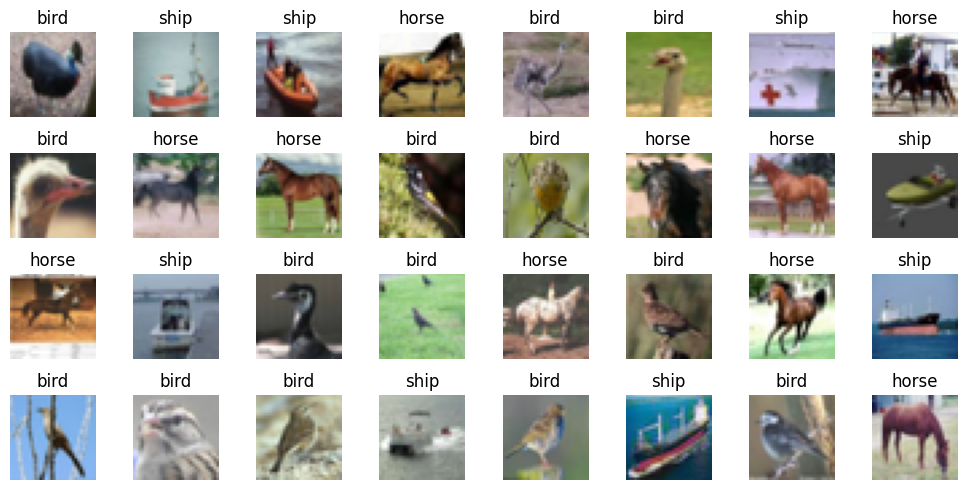

In [4]:
fig = plt.figure(figsize=(10, 5))
for i in range(32):
    img, lbl = dataset[i]

    # Each `lbl` is just an integer. To get the class name, we use the `classes`
    # list.
    img_class = classes[lbl]

    ax = plt.subplot(4, 8, i+1)
    ax.axis('off')
    ax.set_title(img_class)
    ax.imshow(img)
fig.tight_layout()

Now it's your turn to complete the remaining tasks of the assignment by adding code in code cells below. You will find Lab 02 to be a useful reference to have open while working.

_You can create additional code cells by clicking the "+ Code" button in the toolbar._

In [5]:
# 2( a ) Moment features

colourMeans = []
colourStandardDeviations = []


def generateMomentFeatures( dataset ):

    for index in range( 32 ):

        imageLabelTuple = dataset[ index ]
        theImage = imageLabelTuple[ 0 ]

        colourMeans.append( theImage.mean( axis = ( 0, 1 ) ) )
        colourStandardDeviations.append( theImage.std( axis = ( 0, 1 ) ) )

def showMomentFeatures( colourMeans, colourStandardDeviations ):

    print( colourMeans )
    print( colourStandardDeviations )


generateMomentFeatures( dataset )
showMomentFeatures( colourMeans, colourStandardDeviations )

[array([112.67871094, 108.26367188, 110.10058594]), array([152.37597656, 160.71386719, 158.71679688]), array([129.421875  , 120.33007812, 119.05957031]), array([140.78808594, 122.93554688,  91.79101562]), array([135.37988281, 124.33300781, 121.890625  ]), array([142.96582031, 146.21386719,  76.95703125]), array([161.1953125 , 159.15429688, 184.83789062]), array([128.82519531, 123.29589844, 122.57324219]), array([131.95898438, 116.95898438, 103.81347656]), array([137.97753906, 135.50683594, 132.59667969]), array([130.5546875 , 132.62207031,  98.53417969]), array([100.41503906,  94.48535156,  60.92480469]), array([131.07226562, 134.30371094,  84.13085938]), array([106.0390625 ,  97.1015625 ,  79.89355469]), array([140.31054688, 118.33886719, 109.56640625]), array([76.07519531, 75.90332031, 68.09179688]), array([165.546875  , 133.04589844, 104.25390625]), array([113.19433594, 126.59375   , 141.16113281]), array([82.96386719, 81.578125  , 78.04882812]), array([151.26757812, 195.64160156, 1

In [6]:
# 2( b ) Grey-level co-occurrence matrix (GLCM) features

statNames = ['contrast', 'dissimilarity', 'homogeneity', 'ASM', 'energy', \
             'correlation']

glcmFeatures = []

def generateGlcmStatistics( theImage, distances=[1, 3, 5], \
                           angles=[0, math.pi/2, math.pi] ):
    imgGray = cv2.cvtColor( theImage, cv2.COLOR_BGR2GRAY )

    cov = skimage.feature.graycomatrix( imgGray,
                                       distances=distances,
                                       angles=angles,
                                       symmetric=True,
                                       normed=True )
    imgFeatures = []
    for statName in statNames:
        statValue = skimage.feature.graycoprops( cov, statName ).flatten()
        imgFeatures.extend( statValue )

    return imgFeatures

def generateGlcms( dataset ):
    for index in range( 32 ):
        imageLabelTuple = dataset[ index ]
        theImage = imageLabelTuple[ 0 ]
        features = generateGlcmStatistics( theImage )
        glcmFeatures.append( features )

def printGlcms( glcmFeatures ):
    for i, features in enumerate( glcmFeatures ):
        print( f"GLCM Features for Image {i + 1}:" )
        for statName, value in zip( statNames * 9, features ):
            print( f"  {statName.capitalize()}: {value}")
        print("-" * 50)

generateGlcms(dataset)
printGlcms(glcmFeatures)







GLCM Features for Image 1:
  Contrast: 526.0604838709759
  Dissimilarity: 325.6209677419395
  Homogeneity: 526.0604838709759
  Asm: 2180.3081896551303
  Energy: 1655.8405172413547
  Correlation: 2180.3081896551303
  Contrast: 3370.716435185131
  Dissimilarity: 3111.3807870370038
  Homogeneity: 3370.716435185131
  Asm: 14.56048387096801
  Energy: 12.568548387097024
  Correlation: 14.56048387096801
  Contrast: 30.540948275861716
  Dissimilarity: 29.247844827585833
  Homogeneity: 30.540948275861716
  Asm: 41.318287037036264
  Energy: 43.04976851851764
  Correlation: 41.318287037036264
  Contrast: 0.11533241720425556
  Dissimilarity: 0.09716232640052279
  Homogeneity: 0.11533241720425556
  Asm: 0.05233502608069083
  Energy: 0.04017806271907706
  Correlation: 0.05233502608069083
  Contrast: 0.040611943021235816
  Dissimilarity: 0.03180863710798199
  Homogeneity: 0.040611943021235816
  Asm: 0.0006976172281477862
  Energy: 0.0006935524518730723
  Correlation: 0.0006976172281477862
  Contrast:

In [7]:
#( 3 )
# Splitting the data

features = np.array( colourMeans )

labels = []

for index in range( 32 ):
    imageLabelTuple = dataset[ index ]
    theLabel = imageLabelTuple[ 1 ]
    labels.append( theLabel )

labels = np.array( labels )

X_train, X_test, y_train, y_test = train_test_split( features, labels, \
                                                    test_size =0.2, \
                                                     random_state=42 )




In [8]:
#( 4 )( a and b )
# KNN classifiaction

def classificationAccuracy( predictions, labels ):
    return ( predictions == labels ).sum()/len( predictions )

knnClassifier = sklearn.neighbors.KNeighborsClassifier()
knnClassifier.fit( X_train, y_train )
predictionsFromKNN = knnClassifier.predict( X_test )

accuracy = classificationAccuracy( predictionsFromKNN, y_test )
print(f'{ accuracy*100:5.2f}%')



28.57%


In [9]:
#( 4 )( a and b )
# SVM classifiaction

svm_classifier = sklearn.svm.SVC()
svm_classifier.fit(X_train, y_train)

predictionsFromSVM = svm_classifier.predict(X_test)

accuracy = classificationAccuracy( predictionsFromSVM, y_test )
print(f'{accuracy*100:5.2f}%')

14.29%


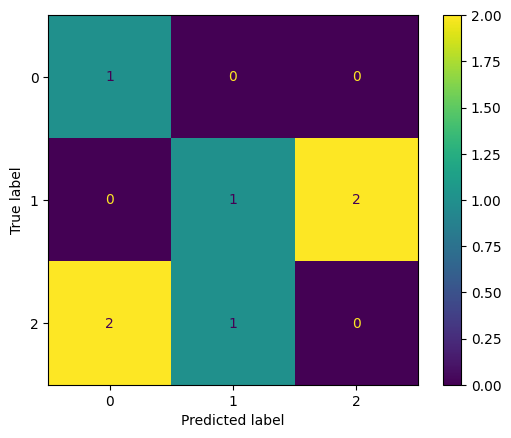

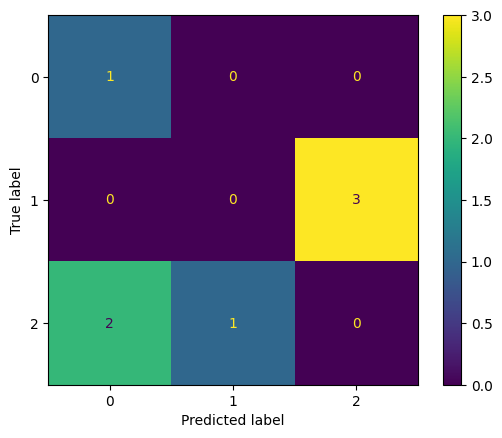

In [10]:
#( 4 )( b )

sklearn.metrics.ConfusionMatrixDisplay.from_predictions( y_test, predictionsFromKNN )
plt.show()
sklearn.metrics.ConfusionMatrixDisplay.from_predictions( y_test, predictionsFromSVM )
plt.show()

Accuracy with k=4: 57.14%


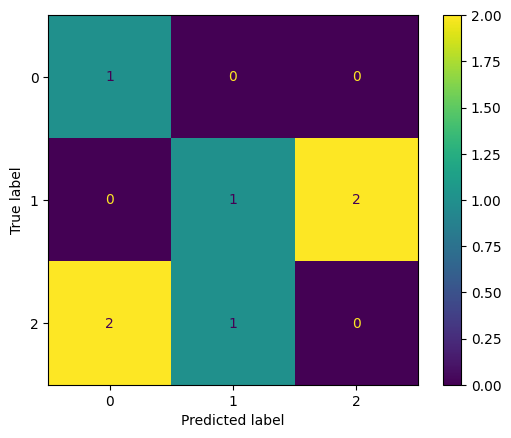

In [11]:
#( 4 )( c )

def trainKnnClassifierWithNeighbours( features, labels, nNeighbours, testSize=0.2, randomState=42 ):

    xTrain, xTest, yTrain, yTest = train_test_split( features, labels, test_size=testSize, random_state=randomState )
    knnClassifier = sklearn.neighbors.KNeighborsClassifier( nNeighbours )
    knnClassifier.fit( xTrain, yTrain )
    return knnClassifier, xTest, yTest

def evaluateKnnClassifier( knnClassifier, xTest, yTest ):

    predictionsFromKnn = knnClassifier.predict( xTest )
    accuracy = classificationAccuracy( predictionsFromKnn, yTest )
    print( f'Accuracy with k={knnClassifier.n_neighbors}: {accuracy * 100:.2f}%' )
    sklearn.metrics.ConfusionMatrixDisplay.from_predictions( y_test, predictionsFromKNN )
    plt.show()


features = np.array( glcmFeatures )
labels = np.array( labels )

knnClassifier, xTest, yTest = trainKnnClassifierWithNeighbours( features, labels, 4 )
evaluateKnnClassifier( knnClassifier, xTest, yTest )

# SO with features as colourstandarddeviations and neighbours = 4 I got 57.4% Accuracy.
# And with GLCM features I got the same accuracy score. However the the scores were consistent with neighbours equal to 1 and 4.


Accuracy with kernel=sigmoid: 57.14%


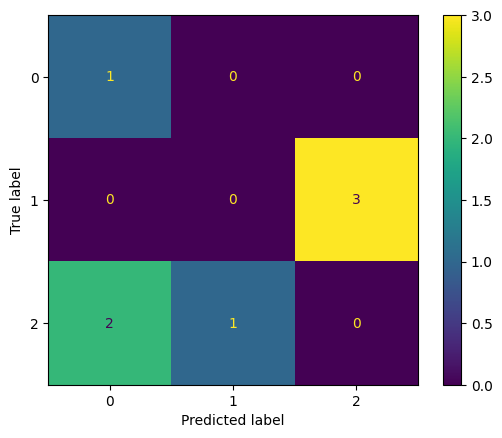

In [12]:
#( 4 )( c )

kernels = [ 'linear', 'poly', 'rbf', 'sigmoid' ]

def trainSvmClassifierWithKernel( features, labels, kernel, testSize=0.2, randomState=42):

    xTrain, xTest, yTrain, yTest = train_test_split( features, labels, test_size=testSize, random_state=randomState )
    svmClassifier = sklearn.svm.SVC( kernel = kernel )
    svmClassifier.fit(xTrain, yTrain)
    return svmClassifier, xTest, yTest

def evaluateSvmClassifier( svmClassifier, xTest, yTest ):

    predictionsFromSvm = svmClassifier.predict(xTest)
    accuracy = classificationAccuracy(predictionsFromSvm, yTest)
    print( f'Accuracy with kernel={svmClassifier.kernel}: {accuracy * 100:.2f}%' )
    sklearn.metrics.ConfusionMatrixDisplay.from_predictions( y_test, predictionsFromSVM )
    plt.show()

features = np.array( glcmFeatures )
labels = np.array( labels )

svmClassifier, xTest, yTest = trainSvmClassifierWithKernel( features, labels, kernels[3] )

evaluateSvmClassifier( svmClassifier, xTest, yTest )

# With Linear and colourMeans 42.86%
# All kernels applied on top of colourMeans were the same

# For colourStandardDeviations Kernel linear and sigmoid produced the highest
# about 42.86%

# Accuracy with sigmoid and glcmFeatures was the highest 57.14%


